In [1]:
import os
main_dir = os.path.dirname(os.path.dirname(os.getcwd()))
os.chdir(main_dir)

import pyvdirs.dirs as dirs
import sys
sys.path.insert(0, dirs.SYSTEM_HOME)
sys.path.insert(0, os.path.join(dirs.SYSTEM_HOME, "ToyExample"))

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# W&B Plots' Data

## Parameters

In [3]:
dir_results = os.path.join(dirs.RESULTS_HOME, "Images", "04_Main_Results")

In [30]:
series = ["Baseline", "Early AJEST", "AJEST", "Random"]
plt_kwargs = dict(color = ["C0", "C3", "C4", "C1"],
                  alpha = [0.5, 0.8, 0.7, 0.6],
                  linewidth = [4, 1, 0.5, 0.5],
                  zorder=[1000,10000,100,10])
plt_kwargs_zoom = dict(color = ["C0", "C3", "C4", "C1"],
                       alpha = [0.6, 0.8, 0.7, 0.6],
                       linewidth = [3, 1, 1, 1],
                       zorder=[1000,10000,100,10])
plt_kwargs = {s:{k:v[i] for k,v in plt_kwargs.items()} for i,s in enumerate(series)}
plt_kwargs_zoom = {s:{k:v[i] for k,v in plt_kwargs_zoom.items()} for i,s in enumerate(series)}

In [5]:
results = {}

## Time

### Load data into Pandas

In [6]:
pandas_data = pd.read_csv(os.path.join(dir_results, "Main_Results_Loss_vs_Time.csv"))

In [7]:
pandas_data

Training Time [sec]  Training time [hs]  \
0             1.055769e+04            0.002933   
1             1.129142e+04            0.003137   
2             1.143390e+04            0.003176   
3             1.543995e+04            0.004289   
4             1.671881e+04            0.004644   
...                    ...                 ...   
65467         1.727988e+08           47.999678   
65468         1.728010e+08           48.000283   
65469         1.728093e+08           48.002574   
65470         1.728143e+08           48.003983   
65471         1.728212e+08           48.005878   

       Group: 06_CorrectEMA_AJEST_00 - Loss  \
0                                       NaN   
1                                       NaN   
2                                       NaN   
3                                 38.754126   
4                                       NaN   
...                                     ...   
65467                                   NaN   
65468                                   NaN   
65469                                   NaN   
65470                                   NaN   
65471                                   NaN   

       Group: 06_CorrectEMA_Early_AJEST_00 - Loss  \
0                                             NaN   
1                                             NaN   
2                                             NaN   
3                                             NaN   
4                                             NaN   
...                                           ...   
65467                                   -9.626287   
65468                                         NaN   
65469                                         NaN   
65470                                  -10.160560   
65471                                   -9.706728   

       Group: 06_CorrectEMA_Random_00 - Loss  \
0                                  20.138007   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   
...                                      ...   
65467                                    NaN   
65468                                    NaN   
65469                              -8.109115   
65470                                    NaN   
65471                                    NaN   

       Group: 04_Tiny_LR_Baseline_04 - Loss  Group: 04_Tiny_LR_Ref_00 - Loss  
0                                       NaN                              NaN  
1                                       NaN                        15.073979  
2                                       NaN                        15.128112  
3                                       NaN                              NaN  
4                                       NaN                        14.986211  
...                                     ...                              ...  
65467                                   NaN                              NaN  
65468                            -10.320302                              NaN  
65469                                   NaN                              NaN  
65470                                   NaN                              NaN  
65471                                   NaN                              NaN  

[65472 rows x 7 columns]

### Preprocess with Pandas

In [8]:
pandas_data = pandas_data.rename(columns={"Group: 06_CorrectEMA_AJEST_00 - Loss":"AJEST",
                                          "Group: 06_CorrectEMA_Early_AJEST_00 - Loss":"Early AJEST",
                                          "Group: 06_CorrectEMA_Random_00 - Loss":"Random",
                                          "Group: 04_Tiny_LR_Baseline_04 - Loss":"Baseline",
                                          "Group: 04_Tiny_LR_Ref_00 - Loss":"Reference"})

### Get data in Numpy

In [9]:
results["time"] = {}
for s in series:
    results["time"][s] = {}
    results["time"][s]["time"], results["time"][s]["loss"] = pandas_data[["Training time [hs]",s]][pd.notna(pandas_data[s])].to_numpy().T

### Plot

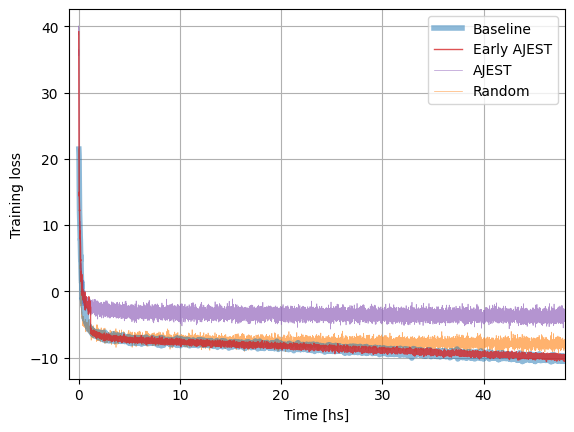

In [10]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["time"][s]["time"], results["time"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Time [hs]")
plt.ylabel("Training loss")
plt.xlim([-1, 48])
plt.grid()

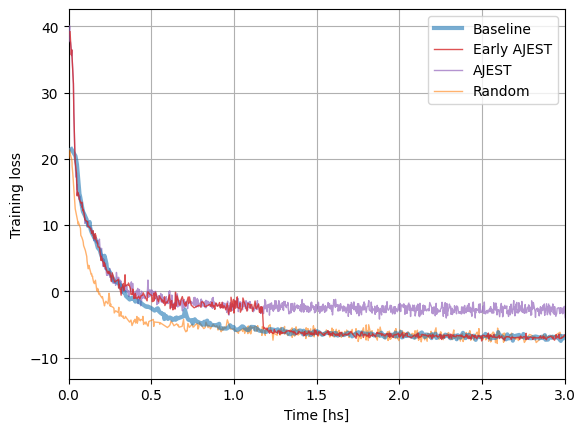

In [31]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["time"][s]["time"], results["time"][s]["loss"], label=s, **plt_kwargs_zoom[s])
plt.legend()
plt.xlabel("Time [hs]")
plt.ylabel("Training loss")
# plt.xlim([-1, 48])
plt.xlim([0, 3])
plt.grid()

## Epoch

### Load data into Pandas

In [12]:
pandas_data = pd.read_csv(os.path.join(dir_results, "Main_Results_Loss_vs_Epoch.csv"))

In [13]:
pandas_data

Epoch  Group: 06_CorrectEMA_AJEST_00 - _step  \
0          0                                    8.0   
1          1                                   18.0   
2          2                                    NaN   
3          3                                   36.0   
4          4                                   45.0   
...      ...                                    ...   
44519  81805                                    NaN   
44520  81809                                    NaN   
44521  81810                                    NaN   
44522  81827                                    NaN   
44523  81838                                    NaN   

       Group: 06_CorrectEMA_AJEST_00 - _step__MIN  \
0                                             8.0   
1                                            18.0   
2                                             NaN   
3                                            36.0   
4                                            45.0   
...                                           ...   
44519                                         NaN   
44520                                         NaN   
44521                                         NaN   
44522                                         NaN   
44523                                         NaN   

       Group: 06_CorrectEMA_AJEST_00 - _step__MAX  \
0                                             8.0   
1                                            18.0   
2                                             NaN   
3                                            36.0   
4                                            45.0   
...                                           ...   
44519                                         NaN   
44520                                         NaN   
44521                                         NaN   
44522                                         NaN   
44523                                         NaN   

       Group: 06_CorrectEMA_AJEST_00 - Loss  \
0                                 38.377435   
1                                 38.953883   
2                                       NaN   
3                                 37.956989   
4                                 36.624354   
...                                     ...   
44519                                   NaN   
44520                                   NaN   
44521                                   NaN   
44522                                   NaN   
44523                                   NaN   

       Group: 06_CorrectEMA_AJEST_00 - Loss__MIN  \
0                                      38.000744   
1                                      37.824091   
2                                            NaN   
3                                      37.645382   
4                                      35.902883   
...                                          ...   
44519                                        NaN   
44520                                        NaN   
44521                                        NaN   
44522                                        NaN   
44523                                        NaN   

       Group: 06_CorrectEMA_AJEST_00 - Loss__MAX  \
0                                      38.754126   
1                                      40.083675   
2                                            NaN   
3                                      38.268596   
4                                      37.345825   
...                                          ...   
44519                                        NaN   
44520                                        NaN   
44521                                        NaN   
44522                                        NaN   
44523                                        NaN   

       Group: 06_CorrectEMA_Early_AJEST_00 - _step  \
0                                              NaN   
1                                              NaN   
2                                             27.0   
3                                        

### Preprocess with Pandas

In [14]:
for c in pandas_data.columns:
    condition = any([st in c for st in ["MIN", "MAX", "step"]])
    if condition: del pandas_data[c]

In [15]:
pandas_data = pandas_data.rename(columns={"Group: 06_CorrectEMA_AJEST_00 - Loss":"AJEST",
                                          "Group: 06_CorrectEMA_Early_AJEST_00 - Loss":"Early AJEST",
                                          "Group: 06_CorrectEMA_Random_00 - Loss":"Random",
                                          "Group: 04_Tiny_LR_Baseline_04 - Loss":"Baseline",
                                          "Group: 04_Tiny_LR_Ref_00 - Loss":"Reference"})

### Get data in Numpy

In [16]:
results["epoch"] = {}
for s in series:
    results["epoch"][s] = {}
    results["epoch"][s]["epoch"], results["epoch"][s]["loss"] = pandas_data[["Epoch",s]][pd.notna(pandas_data[s])].to_numpy().T

### Plot

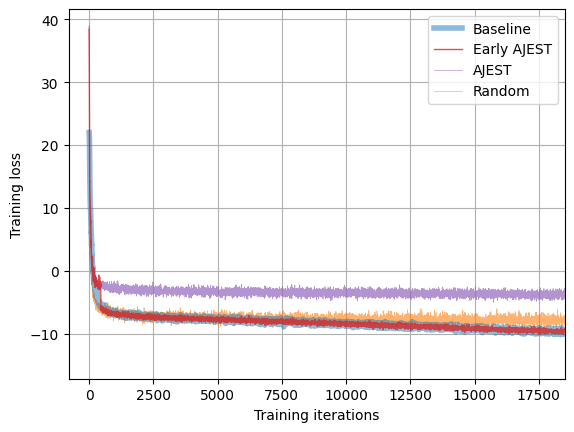

In [32]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Training iterations")
plt.ylabel("Training loss")
plt.xlim([-800, 18500])
plt.grid()

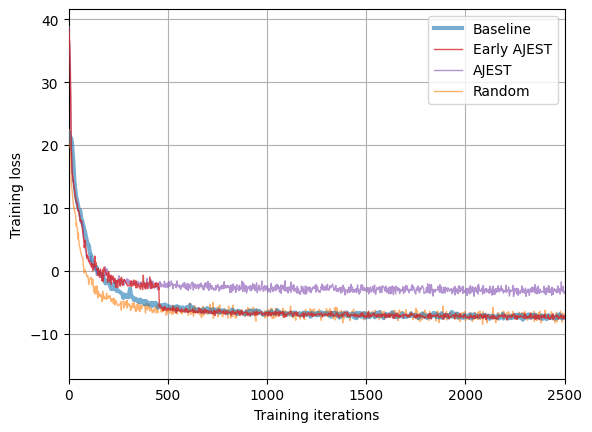

In [33]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs_zoom[s])
plt.legend()
plt.xlabel("Training iterations")
plt.ylabel("Training loss")
plt.xlim([0, 2500])
plt.grid()

## Images seen

### Load data into Pandas

In [19]:
pandas_data = pd.read_csv(os.path.join(dir_results, "Main_Results_Loss_vs_Seen_Images.csv"))

In [20]:
pandas_data

Seen images [kimg]  Group: 06_CorrectEMA_AJEST_00 - _step  \
0                   0.384                                    8.0   
1                   0.768                                   18.0   
2                   1.152                                    NaN   
3                   1.536                                   36.0   
4                   1.920                                   45.0   
...                   ...                                    ...   
73392          167596.032                                    NaN   
73393          167600.128                                    NaN   
73394          167604.224                                    NaN   
73395          167608.320                                    NaN   
73396          167610.368                                    NaN   

       Group: 06_CorrectEMA_AJEST_00 - _step__MIN  \
0                                             8.0   
1                                            18.0   
2                                             NaN   
3                                            36.0   
4                                            45.0   
...                                           ...   
73392                                         NaN   
73393                                         NaN   
73394                                         NaN   
73395                                         NaN   
73396                                         NaN   

       Group: 06_CorrectEMA_AJEST_00 - _step__MAX  \
0                                             8.0   
1                                            18.0   
2                                             NaN   
3                                            36.0   
4                                            45.0   
...                                           ...   
73392                                         NaN   
73393                                         NaN   
73394                                         NaN   
73395                                         NaN   
73396                                         NaN   

       Group: 06_CorrectEMA_AJEST_00 - Loss  \
0                                 38.000744   
1                                 37.824091   
2                                       NaN   
3                                 37.956989   
4                                 35.902883   
...                                     ...   
73392                                   NaN   
73393                                   NaN   
73394                                   NaN   
73395                                   NaN   
73396                                   NaN   

       Group: 06_CorrectEMA_AJEST_00 - Loss__MIN  \
0                                      38.000744   
1                                      37.824091   
2                                            NaN   
3                                      37.645382   
4                                      35.902883   
...                                          ...   
73392                                        NaN   
73393                                        NaN   
73394                                        NaN   
73395                                        NaN   
73396                                        NaN   

       Group: 06_CorrectEMA_AJEST_00 - Loss__MAX  \
0                                      38.000744   
1                                      37.824091   
2                                            NaN   
3                                      38.268596   
4                                      35.902883   
...                                          ...   
73392                                        NaN   
73393                                        NaN   
73394                                        NaN   
73395                                        NaN   
73396                                        NaN   

       Group: 06_CorrectEMA_Early_AJEST_00 - _step  \
0                                              

### Preprocess with Pandas

In [21]:
for c in pandas_data.columns:
    condition = any([st in c for st in ["MIN", "MAX", "step"]])
    if condition: del pandas_data[c]

In [22]:
pandas_data = pandas_data.rename(columns={"Group: 06_CorrectEMA_AJEST_00 - Loss":"AJEST",
                                          "Group: 06_CorrectEMA_Early_AJEST_00 - Loss":"Early AJEST",
                                          "Group: 06_CorrectEMA_Random_00 - Loss":"Random",
                                          "Group: 04_Tiny_LR_Baseline_04 - Loss":"Baseline",
                                          "Group: 04_Tiny_LR_Ref_00 - Loss":"Reference"})

### Get data in Numpy

In [23]:
results["nimg"] = {}
for s in series:
    results["nimg"][s] = {}
    results["nimg"][s]["nimg"], results["nimg"][s]["loss"] = pandas_data[["Seen images [kimg]",s]][pd.notna(pandas_data[s])].to_numpy().T

### Plot

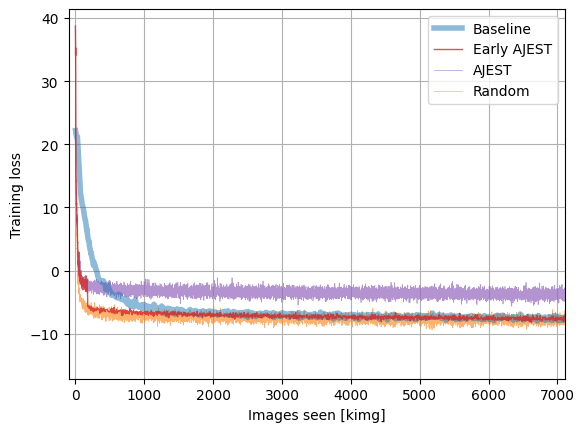

In [24]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 7104])
plt.grid()

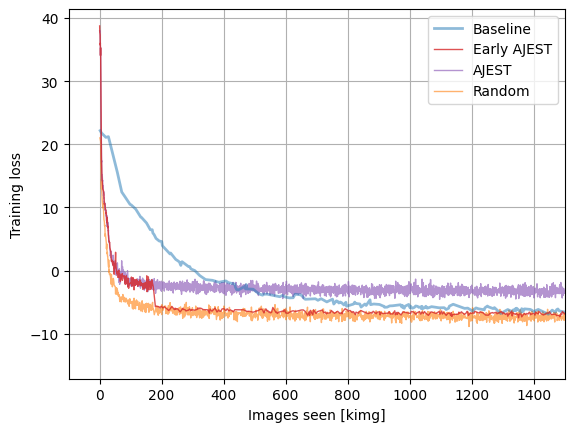

In [29]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs_zoom[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 1500])
plt.grid()

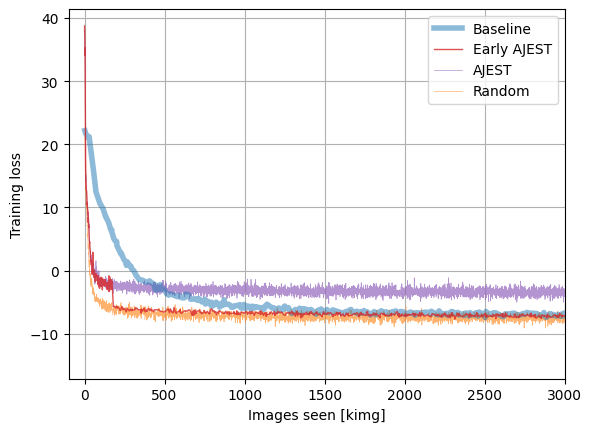

In [26]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 3000])
plt.grid()

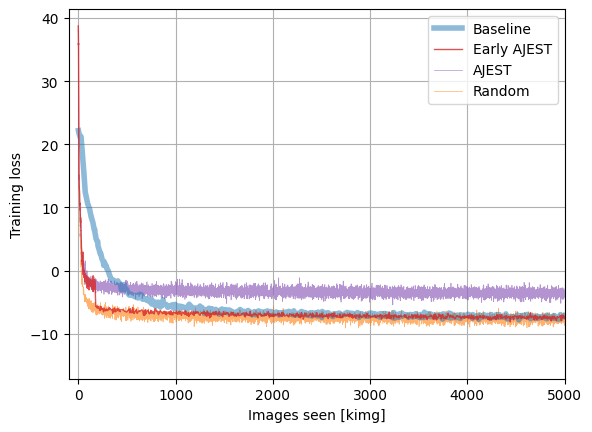

In [27]:
fig, ax = plt.subplots()
for s in series:
    plt.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], label=s, **plt_kwargs[s])
plt.legend()
plt.xlabel("Images seen [kimg]")
plt.ylabel("Training loss")
plt.xlim([-100, 5000])
plt.grid()

## All of those

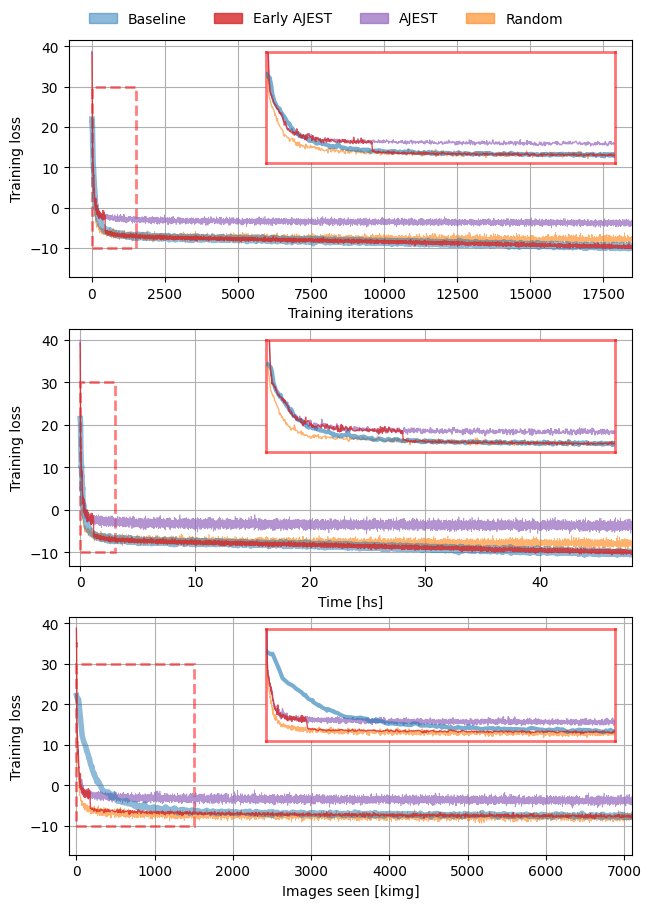

In [90]:
fig, axes = plt.subplots(nrows = 3, layout="constrained")
fig.set_size_inches([6.4, 9])
axes_in = []

# Epoch
ax = axes[0]
for s in series:
    ax.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], **plt_kwargs[s])
ax.set_xlabel("Training iterations")
ax.set_ylabel("Training loss")
ax.set_xlim([-800, 18500])
ax.grid()

# x1, x2, y1, y2 = [0, 2500, *ax.get_ylim()]  # subregion of the original image
x1, x2, y1, y2 = 0, 1500, -10, 30  # subregion of the original image
axin = ax.inset_axes([0.35, 0.48, 0.62, 0.47], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
legend_lines = []
for s in series:
    l, = axin.plot(results["epoch"][s]["epoch"], results["epoch"][s]["loss"], label=s, **plt_kwargs_zoom[s])
    legend_lines.append(l)
axin.set_xticks([]); axin.set_yticks([])
plt.setp(axin.spines.values(), color="red", linewidth=2, alpha=0.55)
axes_in.append(axin)
inset_indicator = ax.indicate_inset_zoom(axin, edgecolor="red", linewidth=2, zorder=5, linestyle="dashed")
for connector in inset_indicator.connectors: connector.set_visible(False)

# Time
ax = axes[1]
for s in series:
    ax.plot(results["time"][s]["time"], results["time"][s]["loss"], **plt_kwargs[s])
ax.set_xlabel("Time [hs]")
ax.set_ylabel("Training loss")
ax.set_xlim([-1, 48])
ax.grid()

# x1, x2, y1, y2 = [0, 2500, *ax.get_ylim()]  # subregion of the original image
x1, x2, y1, y2 = 0, 3, -10, 30  # subregion of the original image
axin = ax.inset_axes([0.35, 0.48, 0.62, 0.47], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
for s in series:
    axin.plot(results["time"][s]["time"], results["time"][s]["loss"], **plt_kwargs_zoom[s])
axin.set_xticks([]); axin.set_yticks([])
plt.setp(axin.spines.values(), color="red", linewidth=2, alpha=0.55)
axes_in.append(axin)
inset_indicator = ax.indicate_inset_zoom(axin, edgecolor="red", linewidth=2, zorder=5, linestyle="dashed")
for connector in inset_indicator.connectors: connector.set_visible(False)

# Images
ax = axes[2]
for s in series:
    ax.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], **plt_kwargs[s])
ax.set_xlabel("Images seen [kimg]")
ax.set_ylabel("Training loss")
ax.set_xlim([-100, 7104])
ax.grid()

# x1, x2, y1, y2 = [0, 2500, *ax.get_ylim()]  # subregion of the original image
x1, x2, y1, y2 = 0, 1500, -10, 30  # subregion of the original image
axin = ax.inset_axes([0.35, 0.48, 0.62, 0.47], xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
for s in series:
    axin.plot(results["nimg"][s]["nimg"], results["nimg"][s]["loss"], **plt_kwargs_zoom[s])
axin.set_xticks([]); axin.set_yticks([])
plt.setp(axin.spines.values(), color="red", linewidth=2, alpha=0.55)
axes_in.append(axin)
inset_indicator = ax.indicate_inset_zoom(axin, edgecolor="red", linewidth=2, zorder=5, linestyle="dashed")
for connector in inset_indicator.connectors: connector.set_visible(False)

fig.legend([Patch(facecolor=plt_kwargs[s]["color"], edgecolor=plt_kwargs[s]["color"], alpha=plt_kwargs[s]["alpha"]) for s in series], 
           [l.get_label() for l in legend_lines], 
           loc='outside upper center', ncols=4, frameon=False)

In [37]:
fig.get_size_inches()

array([6.4, 4.8])